/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


Training Gradient Boosting...
Gradient Boosting - Mean Squared Error: 266.2516786996671
Gradient Boosting - R^2 Score: 0.8651280229290746
--------------------------------------------------
Training Random Forest...
Random Forest - Mean Squared Error: 231.62115947086605
Random Forest - R^2 Score: 0.8826703971901197
--------------------------------------------------
Training Linear Regression...
Linear Regression - Mean Squared Error: 1220.9823997378649
Linear Regression - R^2 Score: 0.38150132601716213
--------------------------------------------------
Training MLP...
MLP - Mean Squared Error: 919.636638424033
MLP - R^2 Score: 0.5341504991935884
--------------------------------------------------
Training XGBoost...
XGBoost - Mean Squared Error: 236.51139759187484
XGBoost - R^2 Score: 0.8801932334899902
--------------------------------------------------
Training LightGBM...
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000421 seconds.
You can set

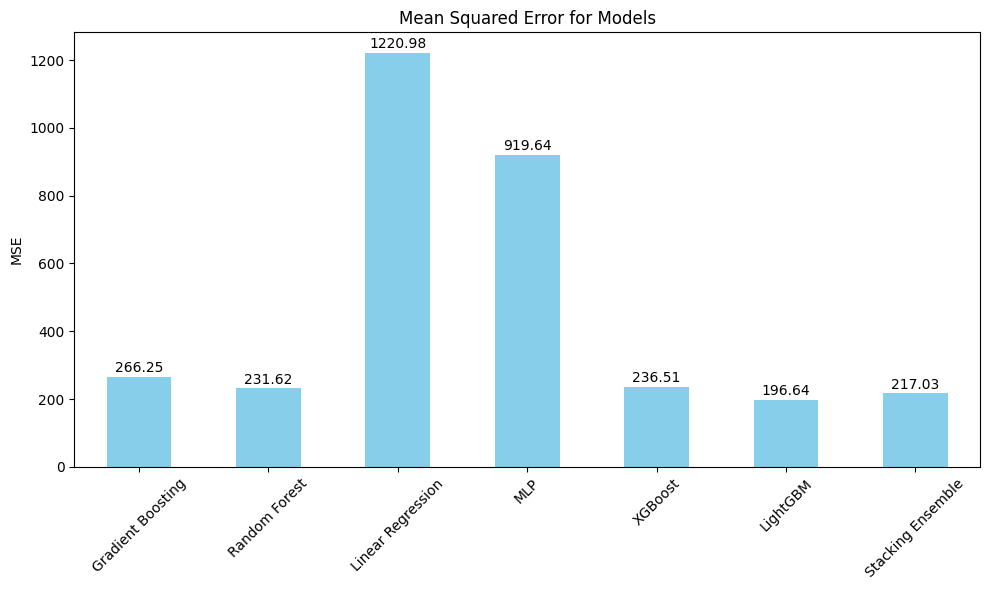

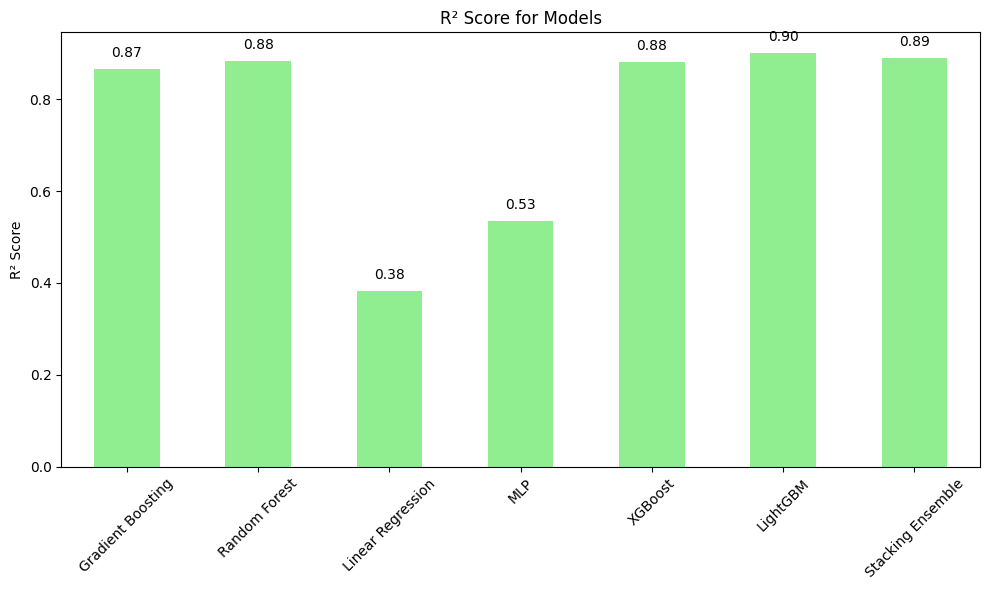

Scatter Plot for Gradient Boosting - Predicted vs Actual


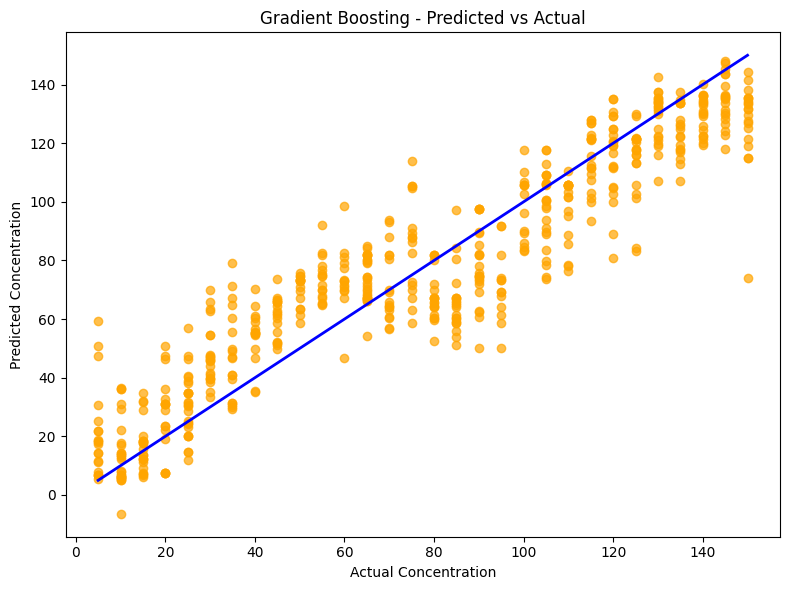

Scatter Plot for Random Forest - Predicted vs Actual


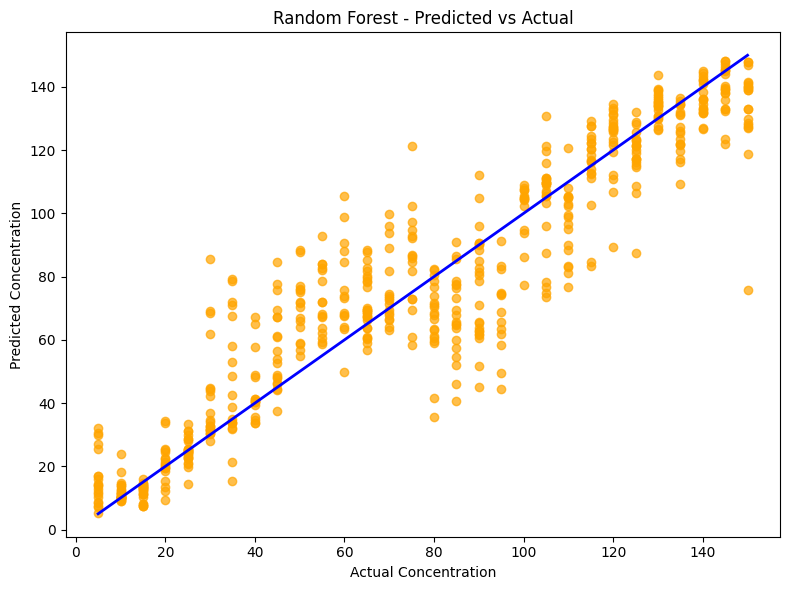

Scatter Plot for Linear Regression - Predicted vs Actual


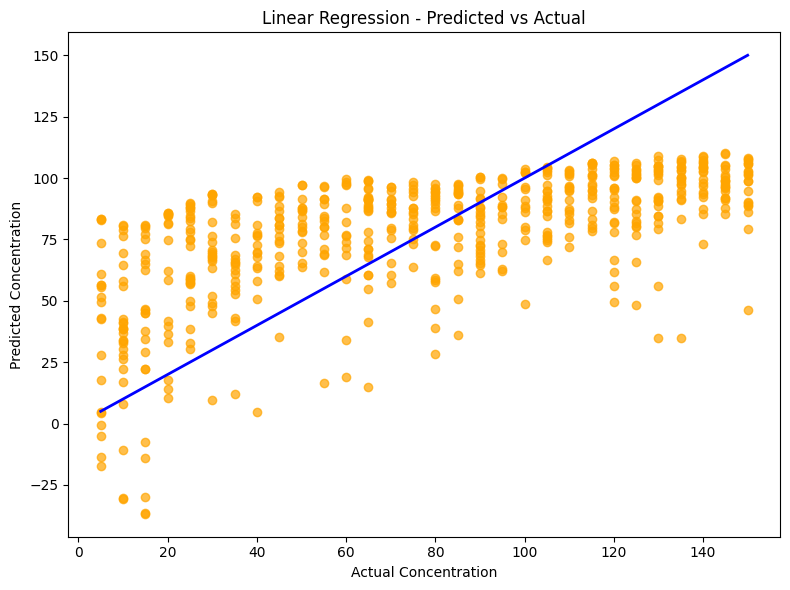

Scatter Plot for MLP - Predicted vs Actual


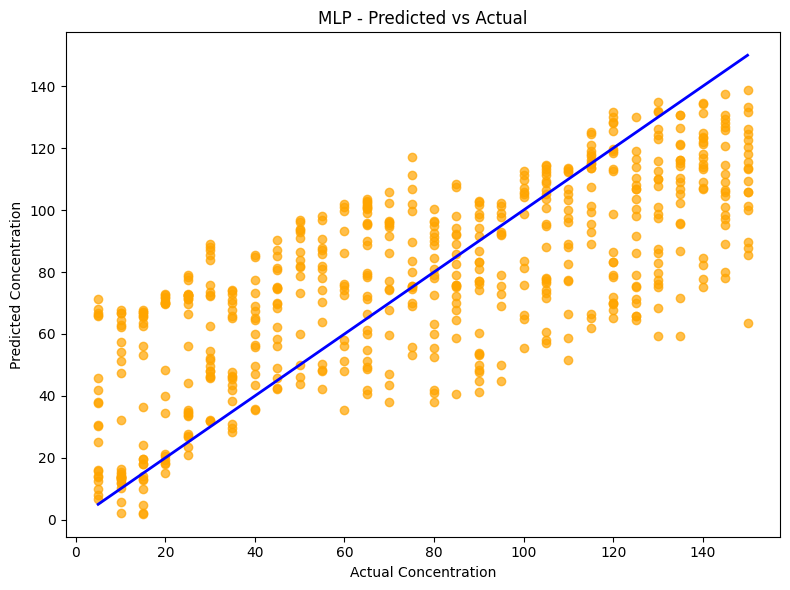

Scatter Plot for XGBoost - Predicted vs Actual


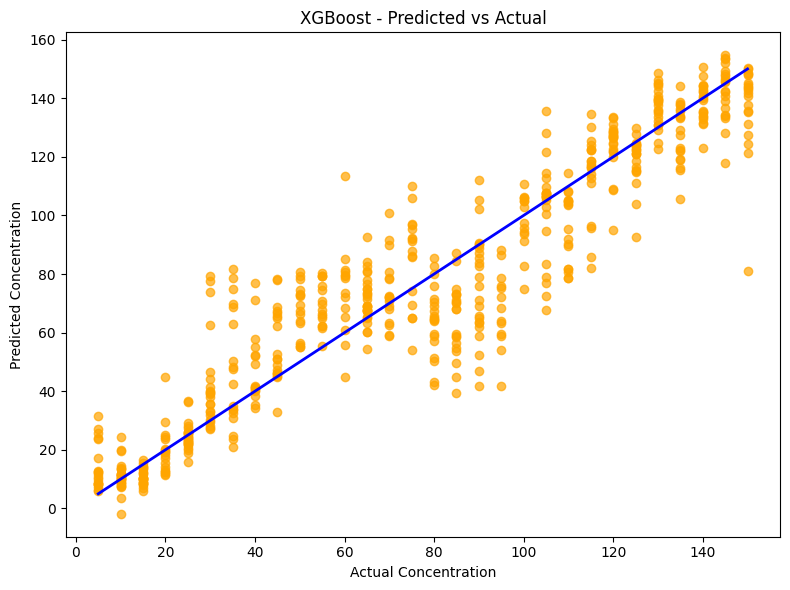

Scatter Plot for LightGBM - Predicted vs Actual


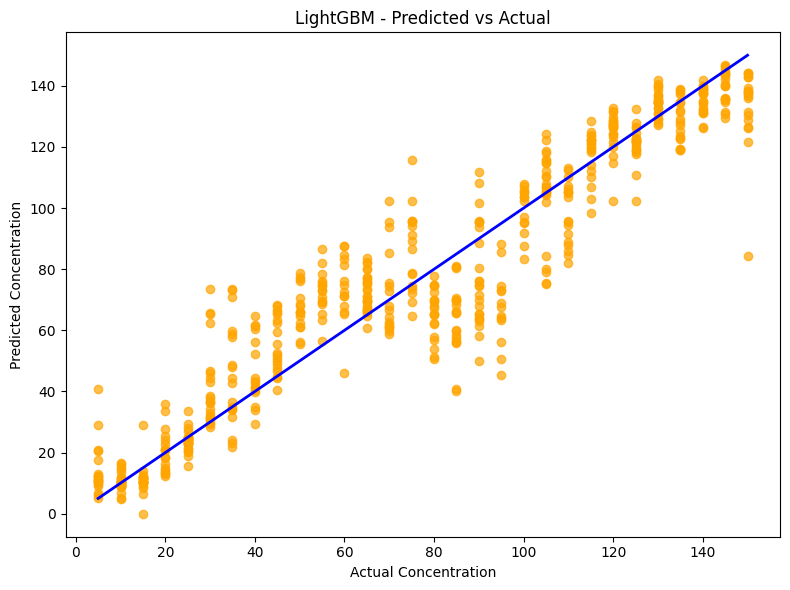

Scatter Plot for Stacking Ensemble - Predicted vs Actual


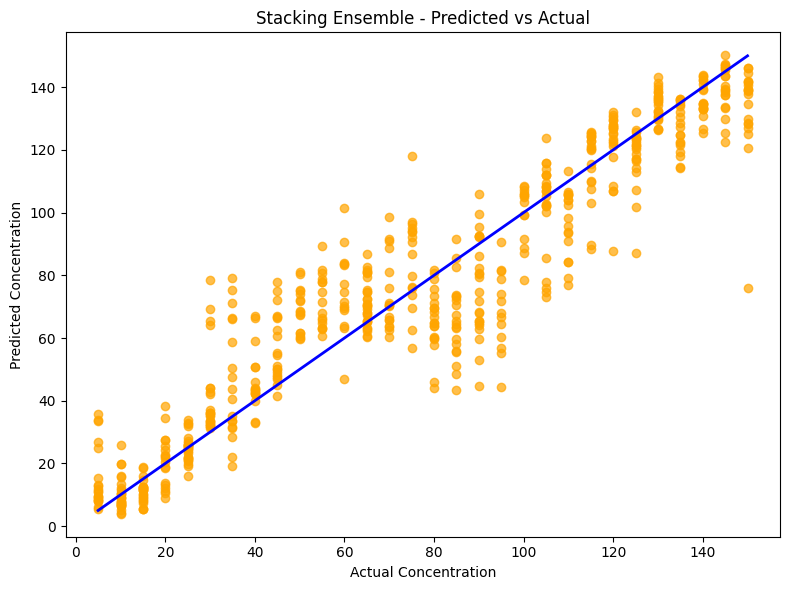

In [ ]:
# Step 1: Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
import numpy as np

# Step 2: Load the CSV file
# Replace 'data.csv' with the path if it's different
data = pd.read_csv('data.csv')

# Step 3: Preprocess the data
X = data[['Voltage', 'Current']]  # Features
y = data['Concentration']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Define the models
models = {
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Linear Regression": LinearRegression(),
    "MLP": MLPRegressor(hidden_layer_sizes=(50, 50), max_iter=500, random_state=42),
    "XGBoost": XGBRegressor(random_state=42),
    "LightGBM": LGBMRegressor(random_state=42)
}

# Step 5: Create Stacking Ensemble Model
stacking_model = StackingRegressor(
    estimators=[('rf', RandomForestRegressor(random_state=42)),
                ('gb', GradientBoostingRegressor(random_state=42)),
                ('xgb', XGBRegressor(random_state=42))],
    final_estimator=LinearRegression()
)

# Add stacking model to our models dictionary
models["Stacking Ensemble"] = stacking_model

# Step 6: Train, predict, and evaluate each model
performance = {}

for model_name, model in models.items():
    print(f"Training {model_name}...")
    model.fit(X_train, y_train)

    # Predict on test data
    y_pred = model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    performance[model_name] = {'MSE': mse, 'R2': r2}

    print(f"{model_name} - Mean Squared Error: {mse}")
    print(f"{model_name} - R^2 Score: {r2}")
    print("-" * 50)

# Step 7: Performance Comparison - MSE and R² Bar Graphs
performance_df = pd.DataFrame(performance).T

# MSE Bar Graph with values displayed
plt.figure(figsize=(10, 6))
mse_plot = performance_df['MSE'].plot(kind='bar', color='skyblue')
plt.title('Mean Squared Error for Models')
plt.ylabel('MSE')
plt.xticks(rotation=45)
plt.tight_layout()

# Show MSE values on top of bars
for i, v in enumerate(performance_df['MSE']):
    mse_plot.text(i, v + 5, f"{v:.2f}", ha='center', va='bottom')

plt.show()

# R² Bar Graph with values displayed
plt.figure(figsize=(10, 6))
r2_plot = performance_df['R2'].plot(kind='bar', color='lightgreen')
plt.title('R² Score for Models')
plt.ylabel('R² Score')
plt.xticks(rotation=45)
plt.tight_layout()

# Show R² values on top of bars
for i, v in enumerate(performance_df['R2']):
    r2_plot.text(i, v + 0.02, f"{v:.2f}", ha='center', va='bottom')

plt.show()

# Step 8: Scatter Plots for Predicted vs Actual values for each model
for model_name, model in models.items():
    print(f"Scatter Plot for {model_name} - Predicted vs Actual")

    # Predict on test data
    y_pred = model.predict(X_test)

    # Scatter plot for Predicted vs Actual
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, alpha=0.7, color='orange')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='blue', lw=2)  # Identity line
    plt.title(f'{model_name} - Predicted vs Actual')
    plt.xlabel('Actual Concentration')
    plt.ylabel('Predicted Concentration')
    plt.tight_layout()
    plt.show()


In [ ]:
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from google.colab import files

# Step 1: Load the CSV file (assumed to be uploaded)
data = pd.read_csv('data.csv')  # Replace 'data.csv' with your actual file path or filename

# Step 2: Preprocess the data
# Assuming columns 'Voltage', 'Current', and 'Concentration' are present
X = data[['Voltage', 'Current']]  # Features (adjust according to your dataset)
y = data['Concentration']        # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Initialize LightGBM Dataset
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

# Step 4: Set parameters for the model
params = {
    'objective': 'regression',       # For regression tasks
    'metric': 'mse',                 # Metric to evaluate
    'boosting_type': 'gbdt',         # Type of boosting (Gradient Boosting Decision Trees)
    'num_leaves': 75,                # Number of leaves in one tree
    'learning_rate': 0.04,           # Learning rate
    'feature_fraction': 0.9          # Fraction of features to use for each tree
}

# Step 5: Train the LightGBM model
gbm = lgb.train(params, train_data, valid_sets=[test_data], num_boost_round=100)

# Step 6: Make predictions
y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration)

# Step 7: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'R^2 Score: {r2}')

# Step 8: Make predictions on the uploaded new file
print("Please upload a CSV file for prediction (containing 'Voltage' and 'Current' columns):")
uploaded = files.upload()

# Assume the uploaded file has 'Voltage' and 'Current' columns
for filename in uploaded.keys():
    # Load the uploaded data
    new_scan_data = pd.read_csv(filename)

    # Check if required columns are present
    if not {'Voltage', 'Current'}.issubset(new_scan_data.columns):
        print("The uploaded file must contain 'Voltage' and 'Current' columns.")
    else:
        # Average the 'Voltage' and 'Current' columns to get a single representation for prediction
        voltage_avg = new_scan_data['Voltage'].mean()
        current_avg = new_scan_data['Current'].mean()

        # Create a DataFrame for the single scan to match model input shape
        scan_features = pd.DataFrame([[voltage_avg, current_avg]], columns=['Voltage', 'Current'])

        # Predict the concentration for the uploaded scan data
        concentration_pred = gbm.predict(scan_features)

        # Display the predicted concentration
        print(f"\nPredicted Concentration for the uploaded scan: {concentration_pred[0]:.4f} nM")


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005795 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 354
[LightGBM] [Info] Number of data points in the train set: 2376, number of used features: 2
[LightGBM] [Info] Start training from score 77.659933
Mean Squared Error (MSE): 189.82069281599257
R^2 Score: 0.9038447672739586
Please upload a CSV file for prediction (containing 'Voltage' and 'Current' columns):


Saving scan1.csv to scan1 (1).csv

Predicted Concentration for the uploaded scan: 144.4000 nM


In [ ]:
import pandas as pd
import numpy as np
from scipy.integrate import trapz
from scipy.stats import skew

# Function to calculate the necessary features for each concentration
def extract_features(data):
    # Initialize a dictionary to store extracted features
    features = {}

    # Extract Peak Height (max current value)
    features['Peak_Height'] = data['Current'].max()

    # Extract Peak Potential (corresponding voltage to Peak Height)
    peak_idx = data['Current'].idxmax()
    features['Peak_Potential'] = data.loc[peak_idx, 'Voltage']

    # Calculate Area Under Curve using trapezoidal rule
    features['Area_Under_Curve'] = trapz(data['Current'], data['Voltage'])

    # Calculate Mean Current
    features['Mean_Current'] = data['Current'].mean()

    # Calculate Standard Deviation of Current
    features['Std_Current'] = data['Current'].std()

    # Calculate Skewness of Current
    features['Skew_Current'] = skew(data['Current'])

    return features

# Function to process the dataset and extract features for each concentration
def process_data(input_file, concentration_range):
    # Read the CSV file
    df = pd.read_csv(input_file)

    # Clean up column names by removing leading/trailing spaces if any
    df.columns = df.columns.str.strip()

    # Check if the expected columns exist in the data
    if 'Concentration' not in df.columns or 'Voltage' not in df.columns or 'Current' not in df.columns:
        print("Error: One or more required columns ('Concentration', 'Voltage', 'Current') are missing.")
        print("Available columns:", df.columns)
        return

    # Create an empty list to store all rows of the output
    output_data = []

    # Process data for each concentration in the given range
    for concentration in concentration_range:
        concentration_data = df[df['Concentration'] == concentration]

        # Extract features for the current concentration
        features = extract_features(concentration_data)
        features['Concentration'] = concentration

        # Append the features along with concentration to the output data
        output_data.append(features)

    # Convert the output data to a DataFrame
    output_df = pd.DataFrame(output_data)

    # Save the output to a new CSV file
    output_df.to_csv('processed_data.csv', index=False)
    print("Processed data saved to 'processed_data.csv'.")

# Ask for file upload
from google.colab import files

print("Please upload your CSV file for processing.")
uploaded = files.upload()

# After file upload, extract the file name
for filename in uploaded.keys():
    input_file = filename
    print(f"File uploaded: {input_file}")

    # Define the concentration range from 5 to 150 with a step of 5
    concentration_range = list(range(5, 151, 5))  # 5, 10, 15, ..., 150

    # Process the data with the specified concentration range
    process_data(input_file, concentration_range)


Please upload your CSV file for processing.


Saving data.csv to data (1).csv
File uploaded: data (1).csv
Processed data saved to 'processed_data.csv'.


<ipython-input-87-33514f413827>:19: DeprecationWarning: 'scipy.integrate.trapz' is deprecated in favour of 'scipy.integrate.trapezoid' and will be removed in SciPy 1.14.0
  features['Area_Under_Curve'] = trapz(data['Current'], data['Voltage'])
<ipython-input-87-33514f413827>:19: DeprecationWarning: 'scipy.integrate.trapz' is deprecated in favour of 'scipy.integrate.trapezoid' and will be removed in SciPy 1.14.0
  features['Area_Under_Curve'] = trapz(data['Current'], data['Voltage'])
<ipython-input-87-33514f413827>:19: DeprecationWarning: 'scipy.integrate.trapz' is deprecated in favour of 'scipy.integrate.trapezoid' and will be removed in SciPy 1.14.0
  features['Area_Under_Curve'] = trapz(data['Current'], data['Voltage'])
<ipython-input-87-33514f413827>:19: DeprecationWarning: 'scipy.integrate.trapz' is deprecated in favour of 'scipy.integrate.trapezoid' and will be removed in SciPy 1.14.0
  features['Area_Under_Curve'] = trapz(data['Current'], data['Voltage'])
<ipython-input-87-33514f

<Figure size 1200x600 with 0 Axes>

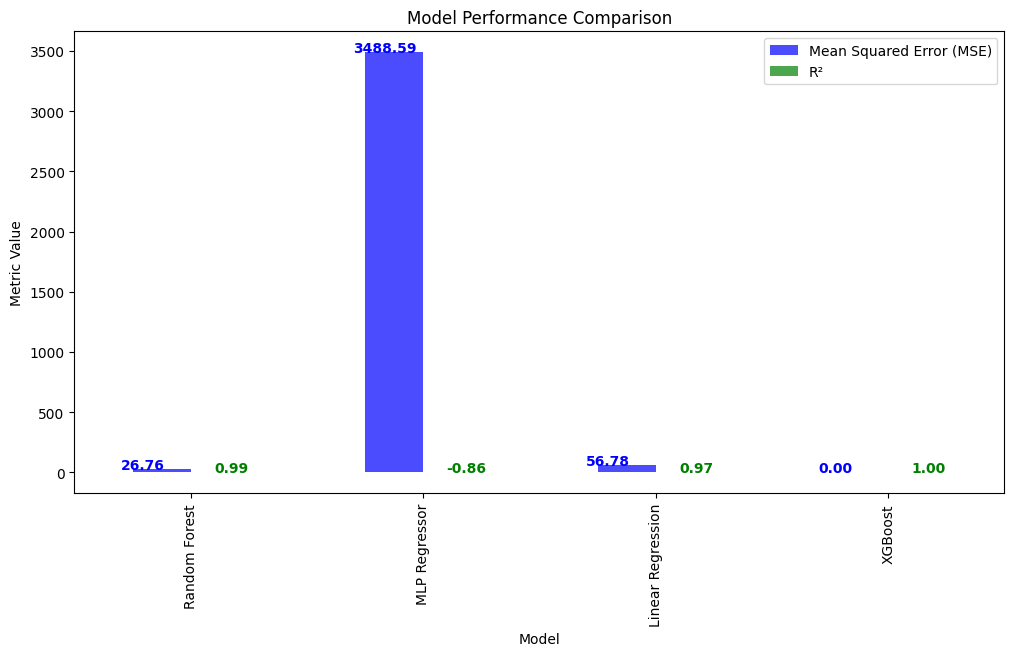

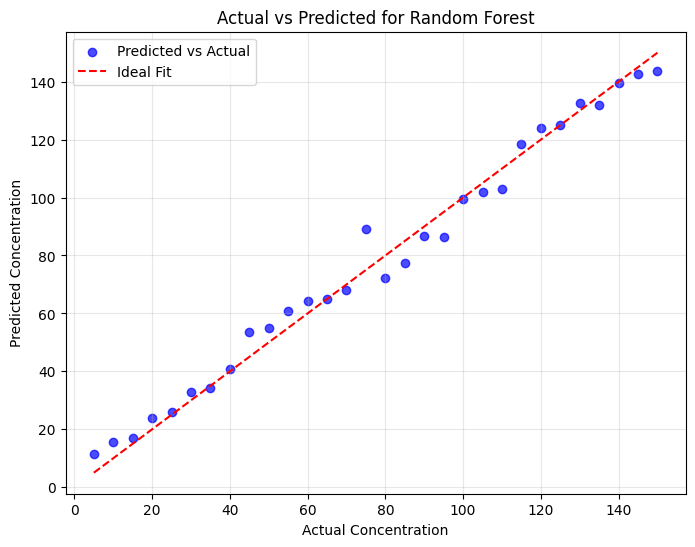

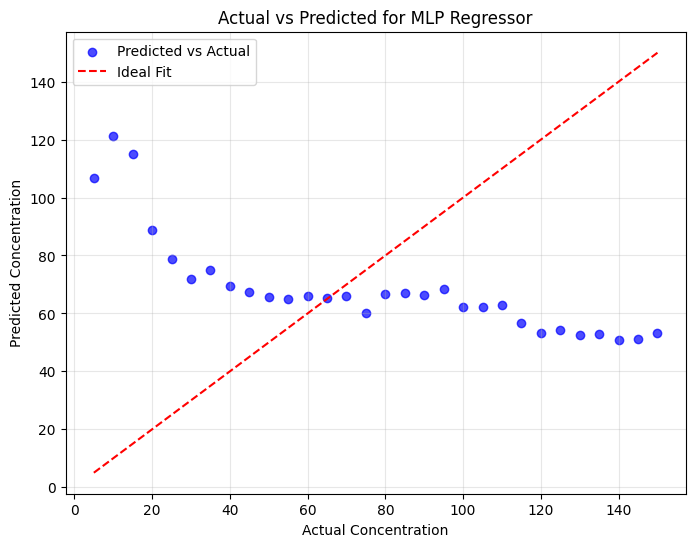

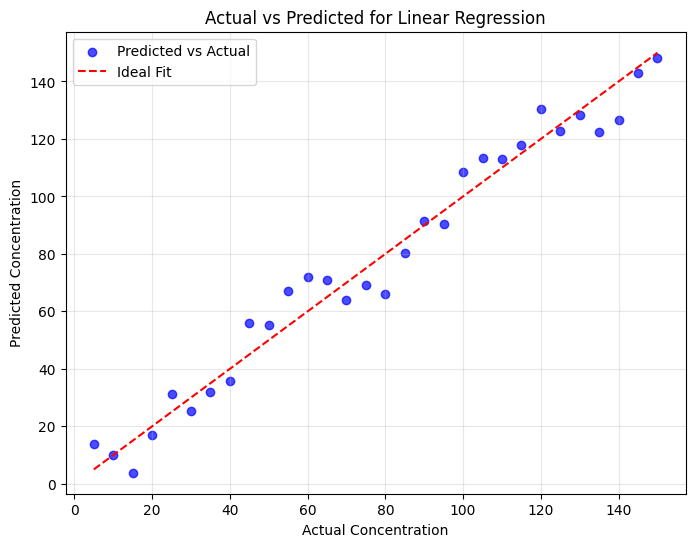

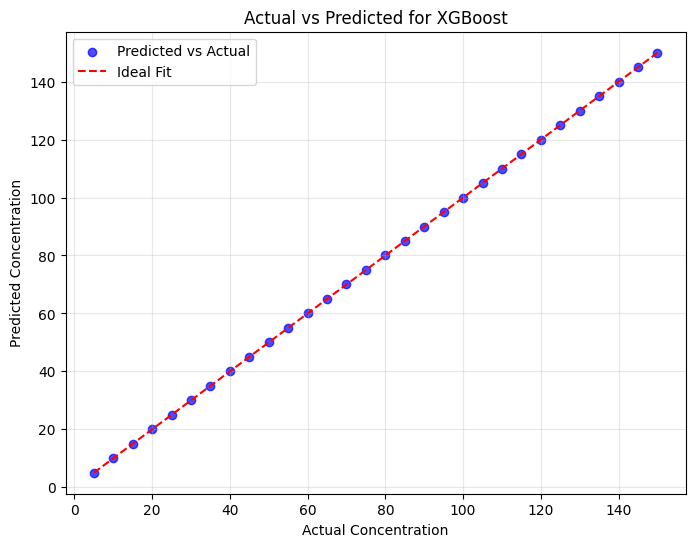

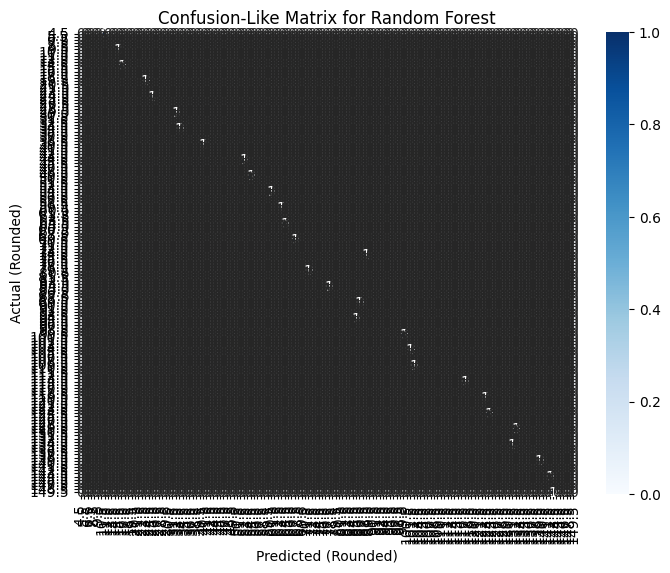

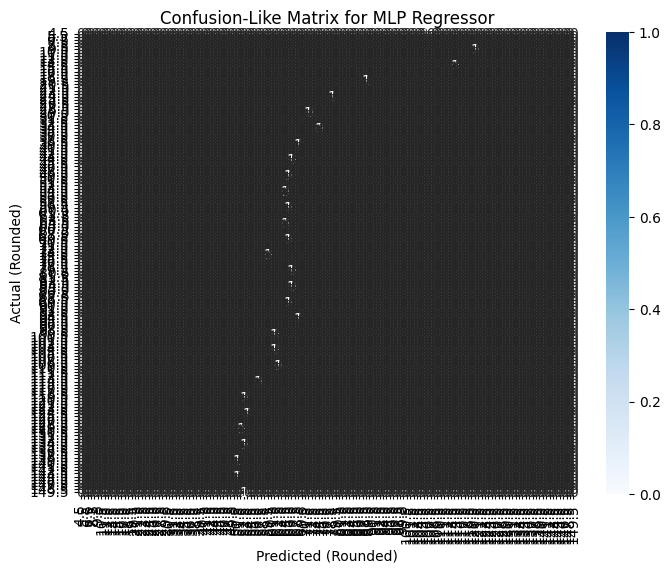

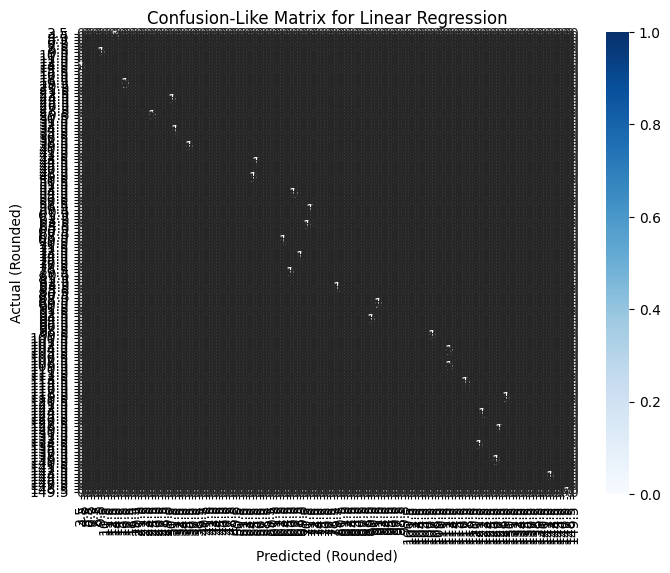

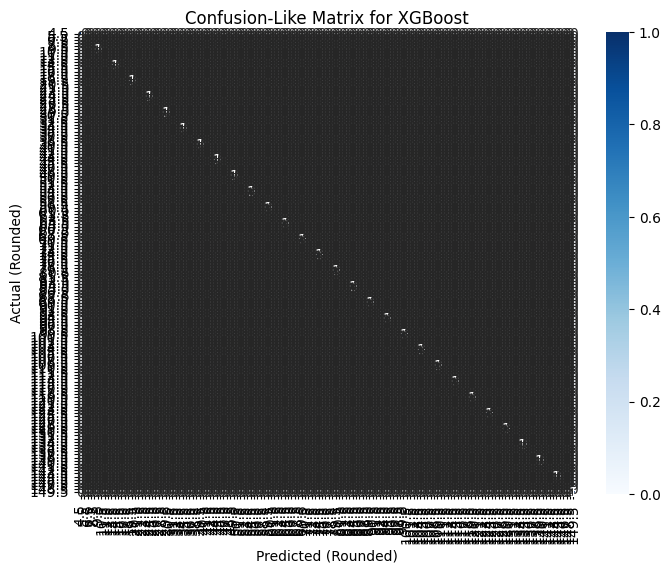

Please upload your CSV file for prediction.


In [ ]:
import pandas as pd
import numpy as np
from scipy.integrate import trapz
from scipy.stats import skew
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

# Function to calculate the necessary features for each concentration
def extract_features(data):
    features = {}
    features['Peak_Height'] = data['Current'].max()
    peak_idx = data['Current'].idxmax()
    features['Peak_Potential'] = data.loc[peak_idx, 'Voltage']
    features['Area_Under_Curve'] = trapz(data['Current'], data['Voltage'])
    features['Mean_Current'] = data['Current'].mean()
    features['Std_Current'] = data['Current'].std()
    features['Skew_Current'] = skew(data['Current'])
    return features

# Load the training dataset
train_data = pd.read_csv("processed_data.csv")

# Extract features and target variable (Concentration)
X_train = train_data.drop(columns=['Concentration'])  # Features
y_train = train_data['Concentration']  # Target variable (Concentration)

# Define models
models = {
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "MLP Regressor": MLPRegressor(hidden_layer_sizes=(100, 100), max_iter=1000, random_state=42),
    "Linear Regression": LinearRegression(),
    "XGBoost": XGBRegressor(n_estimators=100, random_state=42)
}

# Train models and collect metrics
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_train)
    mse = mean_squared_error(y_train, y_pred)
    r2 = r2_score(y_train, y_pred)
    results[name] = {"model": model, "mse": mse, "r2": r2, "predictions": y_pred}

# Compare models using bar graphs
metrics = pd.DataFrame(results).T[['mse', 'r2']]

# Plot comparison bar graph
plt.figure(figsize=(12, 6))
metrics.plot(kind='bar', figsize=(12, 6), color=['blue', 'green'], alpha=0.7)
plt.title('Model Performance Comparison')
plt.ylabel('Metric Value')
plt.xlabel('Model')
for i, row in enumerate(metrics.values):
    plt.text(i-0.3, row[0]+0.02, f"{row[0]:.2f}", color='blue', fontweight='bold')
    plt.text(i+0.1, row[1]+0.02, f"{row[1]:.2f}", color='green', fontweight='bold')
plt.legend(['Mean Squared Error (MSE)', 'R²'], loc='best')
plt.show()

# Actual vs Predicted Graphs for Each Model
for name, data in results.items():
    plt.figure(figsize=(8, 6))
    y_pred = data['predictions']
    plt.scatter(y_train, y_pred, alpha=0.7, color='blue', label='Predicted vs Actual')
    plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], color='red', linestyle='--', label='Ideal Fit')
    plt.title(f"Actual vs Predicted for {name}")
    plt.xlabel("Actual Concentration")
    plt.ylabel("Predicted Concentration")
    plt.legend()
    plt.grid(alpha=0.3)
    plt.show()

# Confusion-like Matrices (Rounded Predictions)
for name, data in results.items():
    y_pred_rounded = np.round(data['predictions'])
    actual_rounded = np.round(y_train)
    bins = np.arange(min(actual_rounded.min(), y_pred_rounded.min()),
                     max(actual_rounded.max(), y_pred_rounded.max()) + 2) - 0.5
    cm, _, _ = np.histogram2d(actual_rounded, y_pred_rounded, bins=(bins, bins))

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm.astype(int), annot=True, fmt='d', cmap='Blues',
                xticklabels=np.arange(bins[:-1].min(), bins[:-1].max()+1),
                yticklabels=np.arange(bins[:-1].min(), bins[:-1].max()+1))
    plt.title(f"Confusion-Like Matrix for {name}")
    plt.xlabel("Predicted (Rounded)")
    plt.ylabel("Actual (Rounded)")
    plt.show()

# Function to process the uploaded data, extract features, and predict concentration
def process_and_predict(input_file):
    df = pd.read_csv(input_file)
    df.columns = df.columns.str.strip()
    if 'Voltage' not in df.columns or 'Current' not in df.columns:
        print("Error: One or more required columns ('Voltage', 'Current') are missing.")
        return
    features = extract_features(df)
    features_df = pd.DataFrame([features])
    predictions = {name: data['model'].predict(features_df)[0] for name, data in results.items()}
    print("Predicted Concentrations:")
    for name, pred in predictions.items():
        print(f"{name}: {pred:.4f}")

# Ask for file upload
print("Please upload your CSV file for prediction.")
uploaded = files.upload()

# Process uploaded files
for filename in uploaded.keys():
    print(f"File uploaded: {filename}")
    process_and_predict(filename)


Model Evaluation on Training Data:
Mean Squared Error (MSE): 7.795130007555902e-07
R-squared (R²): 1.0


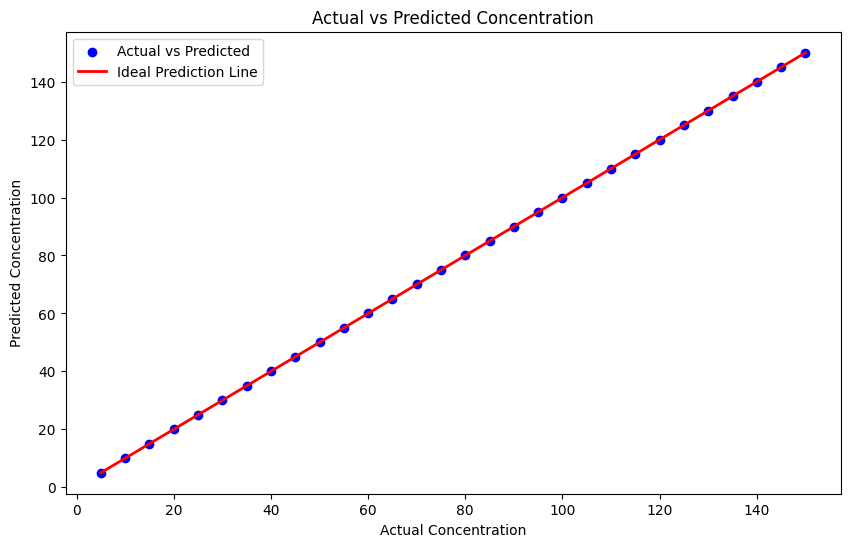

Please upload your CSV file for prediction.


Saving scan_147_5M.csv to scan_147_5M.csv
File uploaded: scan_147_5M.csv
Columns in the uploaded file: Index(['Voltage (V)', 'Current (A)'], dtype='object')
Sample data:
   Voltage (V)  Current (A)
0    -0.500170    13.439939
1    -0.489963    11.339949
2    -0.479755    10.051955
3    -0.469548     9.085959
4    -0.459340     8.357962
Predicted Concentration: 144.9998016357422


<ipython-input-5-354c14b9dd52>:26: DeprecationWarning: 'scipy.integrate.trapz' is deprecated in favour of 'scipy.integrate.trapezoid' and will be removed in SciPy 1.14.0
  features['Area_Under_Curve'] = trapz(data['Current'], data['Voltage'])


In [5]:
import pandas as pd
import numpy as np
from scipy.integrate import trapz
from scipy.stats import skew
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from google.colab import files

# Function to calculate the necessary features for each concentration
def extract_features(data):
    # Standardize column names to generic names for internal processing
    data.rename(columns={'Voltage (V)': 'Voltage', 'Current (A)': 'Current'}, inplace=True)

    # Initialize a dictionary to store extracted features
    features = {}

    # Extract Peak Height (max current value)
    features['Peak_Height'] = data['Current'].max()

    # Extract Peak Potential (corresponding voltage to Peak Height)
    peak_idx = data['Current'].idxmax()
    features['Peak_Potential'] = data.loc[peak_idx, 'Voltage']

    # Calculate Area Under Curve using trapezoidal rule
    features['Area_Under_Curve'] = trapz(data['Current'], data['Voltage'])

    # Calculate Mean Current
    features['Mean_Current'] = data['Current'].mean()

    # Calculate Standard Deviation of Current
    features['Std_Current'] = data['Current'].std()

    # Calculate Skewness of Current
    features['Skew_Current'] = skew(data['Current'])

    return features

# Load the training dataset
train_data = pd.read_csv("processed_data.csv")

# Standardize column names in training data to match feature extraction process
train_data.rename(columns={'Voltage (V)': 'Voltage', 'Current (A)': 'Current'}, inplace=True)

# Extract features and target variable (Concentration)
X_train = train_data.drop(columns=['Concentration'])  # Features
y_train = train_data['Concentration']  # Target variable (Concentration)

# Train an XGBoost Regressor model
model = XGBRegressor(n_estimators=100, random_state=42, objective='reg:squarederror')
model.fit(X_train, y_train)

# Predict on training data
y_train_pred = model.predict(X_train)

# Calculate evaluation metrics
mse = mean_squared_error(y_train, y_train_pred)
r2 = r2_score(y_train, y_train_pred)

# Print evaluation details
print(f"Model Evaluation on Training Data:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")

# Plot Actual vs Predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_train_pred, color='blue', label='Actual vs Predicted')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], color='red', lw=2, label='Ideal Prediction Line')
plt.xlabel('Actual Concentration')
plt.ylabel('Predicted Concentration')
plt.title('Actual vs Predicted Concentration')
plt.legend()
plt.show()

# Function to process the uploaded data, extract features, and predict concentration
def process_and_predict(input_file):
    # Read the uploaded CSV file
    df = pd.read_csv(input_file)

    # Clean up column names by removing leading/trailing spaces if any
    df.columns = df.columns.str.strip()

    # Debugging: Print available columns
    print("Columns in the uploaded file:", df.columns)
    print("Sample data:")
    print(df.head())

    # Standardize column names for internal consistency
    expected_columns = {'Voltage (V)': 'Voltage', 'Current (A)': 'Current'}
    df.rename(columns=expected_columns, inplace=True)

    # Check if the expected columns now exist in the data
    required_columns = ['Voltage', 'Current']
    missing_columns = [col for col in required_columns if col not in df.columns]
    if missing_columns:
        print(f"Error: Missing required columns: {missing_columns}")
        return

    # Extract features for the uploaded scan
    features = extract_features(df)

    # Convert the features into a DataFrame for prediction
    features_df = pd.DataFrame([features])

    # Predict the concentration using the trained model
    predicted_concentration = model.predict(features_df)
    print(f"Predicted Concentration: {predicted_concentration[0]}")

# Ask for file upload
print("Please upload your CSV file for prediction.")
uploaded = files.upload()

# Process each uploaded file
for filename in uploaded.keys():
    input_file = filename
    print(f"File uploaded: {input_file}")
    process_and_predict(input_file)


Model Evaluation on Training Data:
Mean Squared Error (MSE): 26.760499999999997
R-squared (R²): 0.9857118576195774


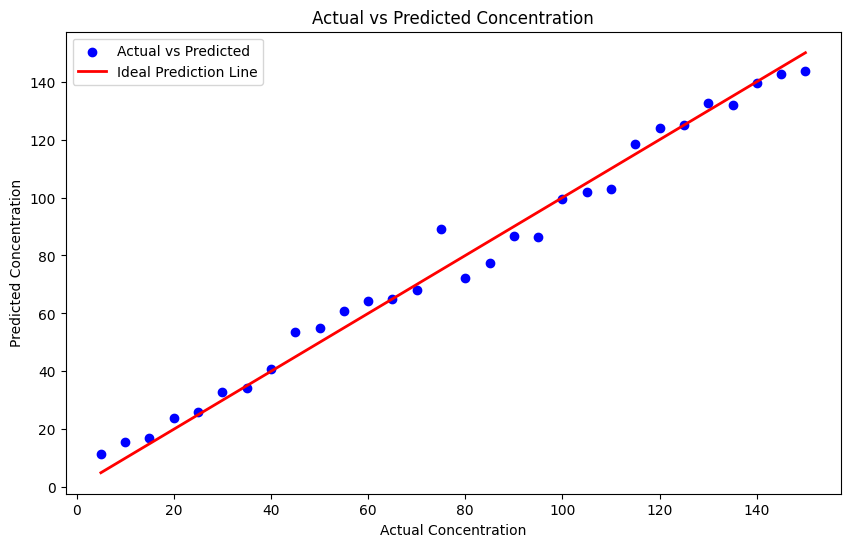

Please upload your CSV file for prediction.


Saving scan_55.csv to scan_55.csv
File uploaded: scan_55.csv
Predicted Concentration: 53.45


<ipython-input-86-4eb2f3749613>:24: DeprecationWarning: 'scipy.integrate.trapz' is deprecated in favour of 'scipy.integrate.trapezoid' and will be removed in SciPy 1.14.0
  features['Area_Under_Curve'] = trapz(data['Current'], data['Voltage'])


In [ ]:
import pandas as pd
import numpy as np
from scipy.integrate import trapz
from scipy.stats import skew
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from google.colab import files

# Function to calculate the necessary features for each concentration
def extract_features(data):
    # Initialize a dictionary to store extracted features
    features = {}

    # Extract Peak Height (max current value)
    features['Peak_Height'] = data['Current'].max()

    # Extract Peak Potential (corresponding voltage to Peak Height)
    peak_idx = data['Current'].idxmax()
    features['Peak_Potential'] = data.loc[peak_idx, 'Voltage']

    # Calculate Area Under Curve using trapezoidal rule
    features['Area_Under_Curve'] = trapz(data['Current'], data['Voltage'])

    # Calculate Mean Current
    features['Mean_Current'] = data['Current'].mean()

    # Calculate Standard Deviation of Current
    features['Std_Current'] = data['Current'].std()

    # Calculate Skewness of Current
    features['Skew_Current'] = skew(data['Current'])

    return features

# Load the training dataset
train_data = pd.read_csv("processed_data.csv")

# Extract features and target variable (Concentration)
X_train = train_data.drop(columns=['Concentration'])  # Features
y_train = train_data['Concentration']  # Target variable (Concentration)

# Train a Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on training data
y_train_pred = model.predict(X_train)

# Calculate evaluation metrics
mse = mean_squared_error(y_train, y_train_pred)
r2 = r2_score(y_train, y_train_pred)

# Print evaluation details
print(f"Model Evaluation on Training Data:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")

# Plot Actual vs Predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_train_pred, color='blue', label='Actual vs Predicted')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], color='red', lw=2, label='Ideal Prediction Line')
plt.xlabel('Actual Concentration')
plt.ylabel('Predicted Concentration')
plt.title('Actual vs Predicted Concentration')
plt.legend()
plt.show()

# Function to process the uploaded data, extract features, and predict concentration
def process_and_predict(input_file):
    # Read the uploaded CSV file
    df = pd.read_csv(input_file)

    # Clean up column names by removing leading/trailing spaces if any
    df.columns = df.columns.str.strip()

    # Check if the expected columns exist in the data
    if 'Voltage' not in df.columns or 'Current' not in df.columns:
        print("Error: One or more required columns ('Voltage', 'Current') are missing.")
        print("Available columns:", df.columns)
        return

    # Extract features for the uploaded scan
    features = extract_features(df)

    # Convert the features into a DataFrame for prediction
    features_df = pd.DataFrame([features])

    # Predict the concentration using the trained model
    predicted_concentration = model.predict(features_df)
    print(f"Predicted Concentration: {predicted_concentration[0]}")

# Ask for file upload
print("Please upload your CSV file for prediction.")
uploaded = files.upload()

# After file upload, extract the file name and process
for filename in uploaded.keys():
    input_file = filename
    print(f"File uploaded: {input_file}")

    # Predict the concentration for the uploaded scan data
    process_and_predict(input_file)
